In [ ]:
from polynomial import Polynomial
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

In [2]:
MAX_DEG = 8
NUM_POINTS = 25
N_TRAIN = int(.9*NUM_POINTS)
NUM_SAMPLES = 100

In [3]:
def f(X):
    '''
    This is our target function
    '''
    return np.sin(X)

def sample(ps, n):
    '''
    Given a set of points (ps) as a numpy array and an integer (n), 
    take a random subset of the points of size n. The shape of ps 
    must be (*,1).
    '''
    if n >= ps.shape[1]:
        return ps
    else:
        return ps[:,np.random.permutation(NUM_POINTS)[:N_TRAIN]]

def mse(u, v = None):
    '''
    Compute the MSE of a pair of vectors. The second vector is optional,
    and defaults to the zero vector if not initialized. 
    '''
    if v is None:
        v = np.zeros(u.shape)
    return 1.0/u.size * np.sum((u-v)**2)

def squared_diff(actual, predictions):
    '''
    Compute MSE from array of actual values and predicted values.
    '''
    sq_diff = (predictions - np.vstack([actual for _ in range(0, predictions.shape[0])]))**2
    return 1.0/predictions.shape[0] * np.sum(sq_diff, axis=0)

def bias(actual, predictions):
    return 1/predictions.shape[0] * np.sum(predictions, axis=0) - actual

def variance(predictions):
    return 1.0/predictions.shape[0] * np.sum(predictions**2, axis=0) - \
           (1.0/predictions.shape[0] * np.sum(predictions, axis=0))**2

In [4]:
'''
Create a set of points along the x-axis (xs) and create the target function
(ys). Add noise and assemble the x-values and y-values into a numpy array.

For each degree D from 1 to MAX_DEG, take a sample of datapoints (S) 
from the original dataset (xs), and perform polynomial linear regression. 
'''

from sklearn.linear_model import LinearRegression

xs = np.linspace(-np.pi, np.pi, NUM_POINTS)
ys = f(xs)
es = np.random.normal(size = xs.shape, scale = .5)
ps = np.vstack([xs, ys + es])

polys = {}
for D in range(1, MAX_DEG+1):
    polys[D] = []
    for S in range(0, NUM_SAMPLES):
        model = LinearRegression()
        ps_train = sample(ps, N_TRAIN)
        xs_train = np.transpose(np.vstack([ps_train[0]**i for i in range(1, D+1)]))
        model.fit(xs_train, ps_train[1])
        poly = Polynomial([model.intercept_]+list(model.coef_))
        polys.get(D).append(poly)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


[0.3249573458344534, 0.32834162883662993, 0.20525541027406408, 0.20609279010129292, 0.1623943263052427, 0.19842700056024035, 0.20247731071016323, 0.3488579202805572]
[0.32134091242315244, 0.32149787632998766, 0.19963467637590399, 0.19380569134675363, 0.14532718466378733, 0.14522606322218726, 0.1371381643896394, 0.14402477613311274]
[0.0036164334113010215, 0.006843752506642254, 0.005620733898160108, 0.012287098754539332, 0.01706714164145527, 0.05320093733805306, 0.06533914632052358, 0.20483314414744427]


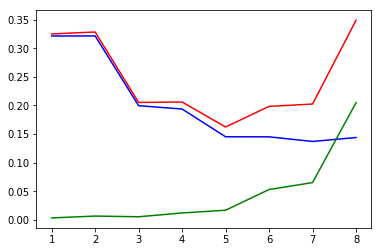

In [5]:
'''
Graph of the bias (blue), variance (green), and total error (red).
'''

total_error = []
biases = []
variances = []
for D in range(1, MAX_DEG+1):
    estimators = np.vstack(p.eval(xs) for p in polys[D])
    total_error.append((squared_diff(ys+es, estimators)).mean())
    biases.append((bias(ys+es, estimators)**2).mean())
    variances.append(variance(estimators).mean())

x_axis = list(range(1,MAX_DEG+1))
plt.plot(x_axis, total_error, 'r')
plt.plot(x_axis, biases, 'b')
plt.plot(x_axis, variances, 'g')
plt.show()

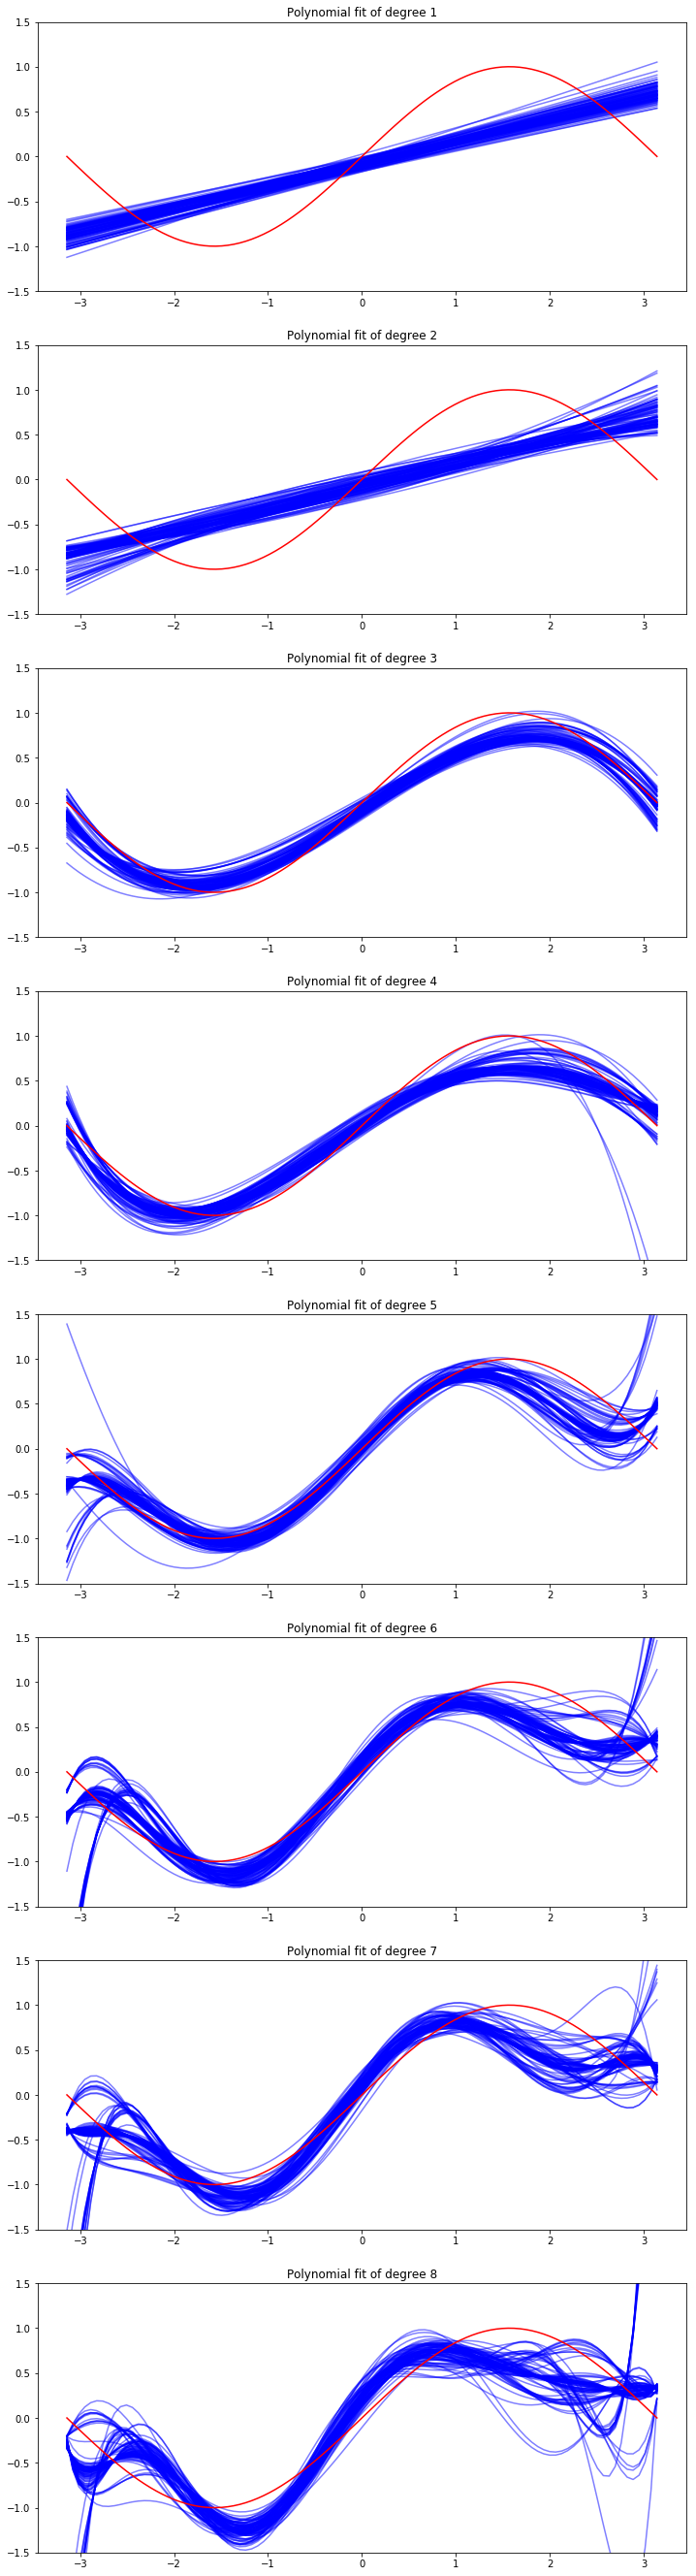

In [7]:
'''
Plots showing all fits for varying degree on samples of the data,
overlayed with the target function.
'''

x_axis = np.linspace(-np.pi, np.pi, 100)

fig, ax = plt.subplots(nrows=MAX_DEG, ncols=1, figsize = (12,MAX_DEG*6))
for i, row in enumerate(ax):
    for p in polys[i+1]:
        row.plot(x_axis, p.eval(x_axis), 'b', alpha = .5)
    row.plot(x_axis, f(x_axis), 'r')
    row.set_ylim(-1.5,1.5)
    row.set_title('Polynomial fit of degree '+str(i+1))
plt.show()

In [8]:
def make_poly(x, D):
    N = len(x)
    X = np.empty((N, D+1))
    for d in range(0, D+1):
        X[:,d] = x**d
        if d>1:
            X[:,d] = (X[:,d] - X[:,d].mean())/X.std()
    return X

In [11]:
make_poly(np.array([1,2,3,4]), 2)

array([[ 1.        ,  1.        , -1.49558173],
       [ 1.        ,  2.        , -0.80531324],
       [ 1.        ,  3.        ,  0.34513424],
       [ 1.        ,  4.        ,  1.95576072]])